Greyscale ℓ1-TV Denoising
=========================

This example demonstrates the use of class [tvl1.TVL1Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Denoise) for removing salt & pepper noise from a greyscale image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 8e-1
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                                'RelStopTol': 5e-3, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl1.TVL1Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  5.53e+04  2.66e+04  3.59e+04  3.69e-01  1.27e+00  1.70e+00
   1  4.77e+04  3.11e+04  2.08e+04  2.69e-01  8.19e-01  1.70e+00


   2  6.50e+04  3.98e+04  3.15e+04  2.92e-01  4.20e-01  9.74e-01
   3  6.16e+04  4.16e+04  2.51e+04  2.61e-01  2.72e-01  8.12e-01
   4  5.15e+04  3.65e+04  1.88e+04  1.84e-01  2.98e-01  8.12e-01
   5  4.74e+04  3.32e+04  1.77e+04  1.49e-01  1.95e-01  6.38e-01


   6  4.33e+04  3.07e+04  1.58e+04  1.29e-01  1.04e-01  5.58e-01
   7  4.18e+04  3.22e+04  1.20e+04  1.06e-01  1.14e-01  6.19e-01
   8  4.03e+04  3.21e+04  1.02e+04  8.32e-02  9.85e-02  6.19e-01
   9  3.77e+04  3.00e+04  9.64e+03  6.47e-02  6.51e-02  6.19e-01


  10  3.67e+04  2.94e+04  9.08e+03  5.39e-02  5.51e-02  6.19e-01
  11  3.69e+04  3.00e+04  8.63e+03  5.06e-02  4.79e-02  6.19e-01
  12  3.62e+04  2.94e+04  8.47e+03  4.60e-02  3.50e-02  6.19e-01
  13  3.50e+04  2.84e+04  8.14e+03  3.72e-02  3.36e-02  7.09e-01


  14  3.41e+04  2.80e+04  7.69e+03  3.06e-02  3.27e-02  7.09e-01
  15  3.43e+04  2.82e+04  7.54e+03  3.00e-02  2.43e-02  7.09e-01
  16  3.43e+04  2.83e+04  7.46e+03  2.88e-02  1.90e-02  7.87e-01
  17  3.38e+04  2.80e+04  7.31e+03  2.49e-02  2.29e-02  9.69e-01


  18  3.34e+04  2.76e+04  7.23e+03  2.17e-02  2.25e-02  9.69e-01
  19  3.35e+04  2.77e+04  7.30e+03  2.10e-02  1.74e-02  9.69e-01
  20  3.36e+04  2.77e+04  7.33e+03  2.04e-02  1.46e-02  1.07e+00
  21  3.34e+04  2.76e+04  7.28e+03  1.87e-02  1.67e-02  1.26e+00


  22  3.32e+04  2.75e+04  7.23e+03  1.72e-02  1.68e-02  1.26e+00
  23  3.32e+04  2.75e+04  7.22e+03  1.65e-02  1.41e-02  1.26e+00
  24  3.32e+04  2.75e+04  7.22e+03  1.61e-02  1.18e-02  1.26e+00
  25  3.32e+04  2.74e+04  7.20e+03  1.52e-02  1.25e-02  1.47e+00


  26  3.31e+04  2.74e+04  7.19e+03  1.42e-02  1.36e-02  1.62e+00
  27  3.31e+04  2.74e+04  7.19e+03  1.36e-02  1.28e-02  1.62e+00
  28  3.31e+04  2.74e+04  7.20e+03  1.31e-02  1.13e-02  1.62e+00
  29  3.31e+04  2.73e+04  7.21e+03  1.27e-02  1.03e-02  1.62e+00


  30  3.31e+04  2.73e+04  7.20e+03  1.21e-02  1.05e-02  1.80e+00
  31  3.31e+04  2.73e+04  7.19e+03  1.16e-02  1.02e-02  1.80e+00
  32  3.30e+04  2.73e+04  7.19e+03  1.12e-02  9.51e-03  1.80e+00
  33  3.30e+04  2.73e+04  7.19e+03  1.09e-02  8.83e-03  1.80e+00


  34  3.30e+04  2.73e+04  7.18e+03  1.05e-02  9.03e-03  1.99e+00
  35  3.30e+04  2.73e+04  7.19e+03  1.01e-02  8.84e-03  1.99e+00
  36  3.30e+04  2.72e+04  7.19e+03  9.77e-03  8.37e-03  1.99e+00
  37  3.30e+04  2.72e+04  7.19e+03  9.47e-03  7.87e-03  1.99e+00


  38  3.30e+04  2.72e+04  7.19e+03  9.13e-03  7.97e-03  2.19e+00
  39  3.30e+04  2.72e+04  7.19e+03  8.83e-03  7.78e-03  2.19e+00
  40  3.30e+04  2.72e+04  7.19e+03  8.55e-03  7.38e-03  2.19e+00
  41  3.30e+04  2.72e+04  7.19e+03  8.30e-03  7.03e-03  2.19e+00


  42  3.29e+04  2.72e+04  7.19e+03  8.04e-03  6.74e-03  2.19e+00
  43  3.29e+04  2.72e+04  7.19e+03  7.79e-03  6.49e-03  2.19e+00
  44  3.29e+04  2.72e+04  7.19e+03  7.52e-03  6.60e-03  2.40e+00
  45  3.29e+04  2.72e+04  7.19e+03  7.27e-03  6.51e-03  2.40e+00


  46  3.29e+04  2.72e+04  7.19e+03  7.04e-03  6.23e-03  2.40e+00
  47  3.29e+04  2.72e+04  7.19e+03  6.82e-03  5.93e-03  2.40e+00
  48  3.29e+04  2.72e+04  7.19e+03  6.60e-03  5.71e-03  2.40e+00
  49  3.29e+04  2.72e+04  7.19e+03  6.39e-03  5.54e-03  2.40e+00


  50  3.29e+04  2.72e+04  7.19e+03  6.19e-03  5.35e-03  2.40e+00
  51  3.29e+04  2.71e+04  7.19e+03  5.99e-03  5.10e-03  2.40e+00
  52  3.29e+04  2.71e+04  7.19e+03  5.81e-03  4.85e-03  2.40e+00
  53  3.29e+04  2.71e+04  7.19e+03  5.63e-03  4.68e-03  2.40e+00


  54  3.29e+04  2.71e+04  7.18e+03  5.43e-03  4.82e-03  2.63e+00
  55  3.29e+04  2.71e+04  7.18e+03  5.26e-03  4.73e-03  2.63e+00
  56  3.29e+04  2.71e+04  7.18e+03  5.09e-03  4.59e-03  2.63e+00
  57  3.29e+04  2.71e+04  7.18e+03  4.93e-03  4.44e-03  2.63e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time:  3.81 s
Noisy image PSNR:    11.32 dB
Denoised image PSNR: 28.63 dB


Display reference, corrupted, and denoised images.

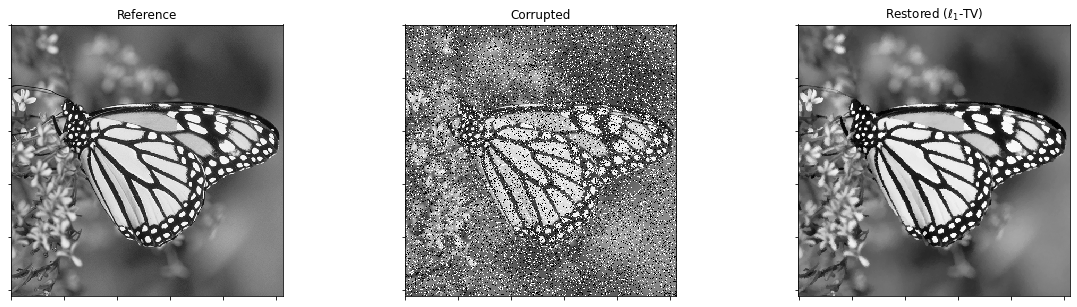

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

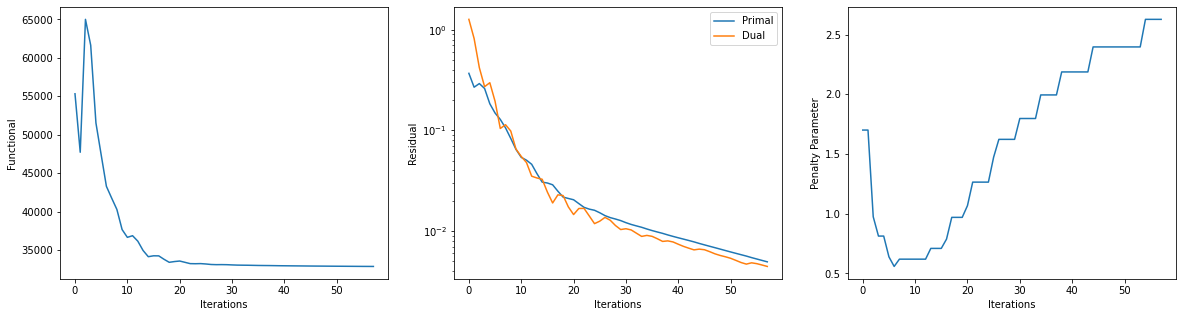

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()